In [3]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
import datetime as dt


In [4]:
ratings_df = pd.read_csv("data/movie_lense/ratings.csv")

In [5]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit = 's')

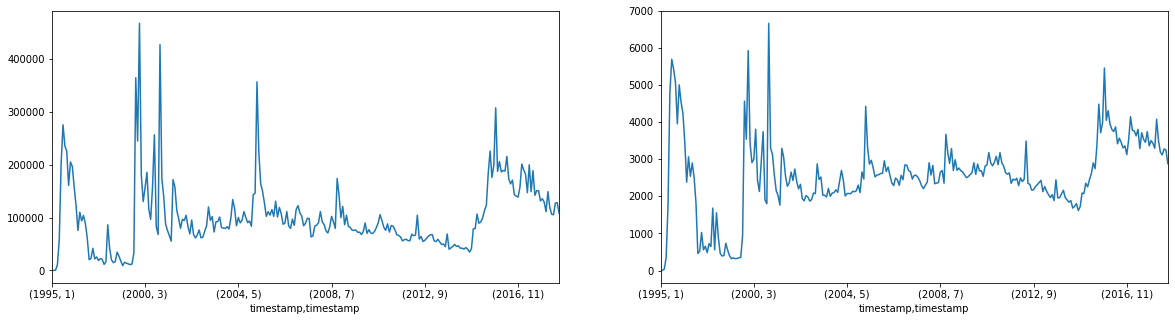

In [6]:
# exploring trends in user rating count and unique user counts
ratings_df.sort_values(by = ['timestamp'])
fig, axs = plt.subplots(1,2, figsize = (20,5))
#ratings_df.groupby([ratings_df['timestamp'].dt.year]).userId.count().plot(ax=axs[0])
#ratings_df.groupby([ratings_df['timestamp'].dt.year]).userId.nunique().plot(ax=axs[1])
ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.count().plot(ax=axs[0])
ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.nunique().plot(ax=axs[1])

In [7]:
#numRatings_df.plot()
numRatings_df = ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.count()
uniqueUsers_df = ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.nunique()

# lol i got fed up with pandas so I did it this way
vector_X = []
vector_X.append("1995-1")

for i in range(1996, 2018):
    for j in range(1, 13):
        vector_X.append(str(i)+"-"+str(j))
        
vector_X.remove("1997-8")

for i in range (1, 10):
    vector_X.append("2018-"+str(i))

vector_y_numRatings = np.array(numRatings_df)#.reshape(len(numRatings_df), 1)
vector_y_uniqueUsers = np.array(uniqueUsers_df)#.reshape(len(uniqueUsers_df), 1)
vector_X = np.array(vector_X)

vector_X_time = pd.to_datetime(vector_X, format='%Y-%m', errors='ignore') #pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
vector_X = np.array(vector_X_time.map(dt.datetime.toordinal))
vector_X = vector_X.reshape(len(vector_X), 1)

#uniqueUsers_df = ratings_df.groupby([ratings_df['timestamp'].dt.year, ratings_df['timestamp'].dt.month]).userId.nunique()

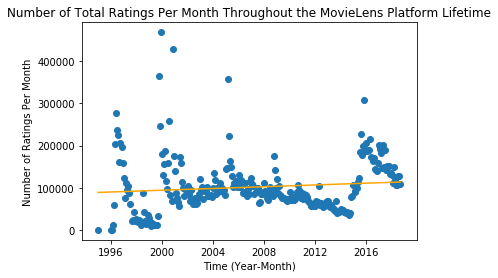

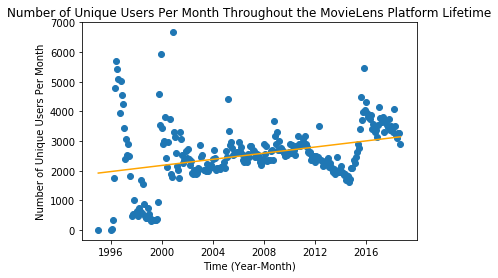

In [8]:
#vector_y_uniqueUsers
regr_numRatings = LinearRegression().fit(vector_X, vector_y_numRatings)
pred_numRatings = regr_numRatings.predict(vector_X)
plt.scatter(vector_X_time, vector_y_numRatings)
plt.plot(vector_X, pred_numRatings, color='orange')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Ratings Per Month")
plt.title("Number of Total Ratings Per Month Throughout the MovieLens Platform Lifetime")
plt.show()


plt.figure()
regr_uniqueUsers = LinearRegression().fit(vector_X, vector_y_uniqueUsers)
pred_uniqueUsers = regr_uniqueUsers.predict(vector_X)
plt.scatter(vector_X_time, vector_y_uniqueUsers)
plt.plot(vector_X, pred_uniqueUsers, color='orange')
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Unique Users Per Month")
plt.title("Number of Unique Users Per Month Throughout the MovieLens Platform Lifetime")
plt.show()

In [9]:
uniqueUsers_df
numRatings_df

timestamp  timestamp
1995       1                 4
1996       1                66
           2               588
           3             10748
           4             58960
                         ...  
2018       5            106666
           6            105522
           7            127534
           8            128470
           9            108572
Name: userId, Length: 273, dtype: int64

In [11]:
genometags_df = pd.read_csv("data/movie_lense/genome-tags.csv")
genomescores_df = pd.read_csv("data/movie_lense/genome-scores.csv")
tags_df = pd.read_csv("data/movie_lense/tags.csv")
# oscars_df = pd.read_csv("")
netflix_df = pd.read_csv("data/netflix_titles.csv")

In [12]:
movies_df.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [35]:
movies_df = pd.read_csv("data/movie_lense/movies.csv")
pattern = r'(\([0-9][0-9][0-9][0-9]\))'
a = movies_df['title'].str.contains(pattern)
movies_df['release'] = movies_df['title'].str.extract(pattern, expand=True)
movies_df['release'] = movies_df['release'].str.replace('(', "")
movies_df['release'] = movies_df['release'].str.replace(')', "")
movies_df['title'] = movies_df['title'].str.replace(pattern, "")
movies_df['release'] = pd.to_numeric(movies_df['release'])
# movies_df['release'] = pd.to_datetime(movies_df['release'], format = '%Y')
# movies_df['release'] = movies_df['release'].dt.year
movies_df['title'] = movies_df['title'].str.rstrip()
movies_df

,movieId,title,genres,release
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0
...,...,...,...,...
58093,193876,The Great Glinka,(no genres listed),1946.0
58094,193878,Les tribulations d'une caissière,Comedy,2011.0
58095,193880,Her Name Was Mumu,Drama,2016.0
58096,193882,Flora,Adventure|Drama|Horror|Sci-Fi,2017.0


In [40]:
netflix_df_movies = netflix_df[netflix_df['type'] == 'Movie']
# netflix_df_movies["release"] = pd.to_datetime(netflix_df_movies['release_year'], format = '%Y')
# netflix_df_movies["release"] = netflix_df_movies["release"].dt.year
netflix_df_movies["release"] = pd.to_numeric(netflix_df_movies["release_year"])
netflix_df_movies

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",2014
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,2007
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,2015
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,2014
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...,2015


In [59]:
# netflix_df_movies = netflix_df[netflix_df['type'] == 'Movie']
# netflix_rerelease_df_large = pd.merge(netflix_df_movies, movies_df, how = 'inner', on = ["title"])
netflix_rerelease_df = pd.merge(netflix_df_movies, movies_df, how = 'inner', on = ["release", "title"])

# netflix_rerelease_df = netflix_rerelease_df.drop(columns = ['type', 'show_id', 'release'])
# not using show_id becasue the movie Shakar had two different show Ids
# netflix_rerelease_df = netflix_rerelease_df.drop_duplicates(subset=['director', 'release_year', 'duration', 'title'], keep='last')
# netflix_rerelease_df_large
netflix_rerelease_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,release,movieId,genres
0,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,177545,Comedy
1,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2014,111259,Drama|Thriller
2,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,2014,185925,Drama
3,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",2015,130083,Action|Crime|Drama|Thriller
4,80057969,Movie,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,2015,140162,Drama|Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,80097468,Movie,The Bad Kids,"Keith Fulton, Louis Pepe",NaN,United States,"April 1, 2017",2016,TV-MA,101 min,Documentaries,"In this documentary, teachers at a Mojave Dese...",2016,185229,Documentary
1598,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81 min,"Dramas, International Movies",After spending much of his adult life in New Y...,2016,184615,Comedy|Drama
1599,80093107,Movie,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...,2016,163775,Action|Thriller
1600,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,2015,164298,Comedy|Drama


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,cast,country,date_added,description,director,duration,genres,listed_in,movieId,rating,release,release_x,release_y,release_year,show_id,title,type
0,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",When nerdy high schooler Dani finally attracts...,Fernando Lebrija,99 min,Comedy,Comedies,177545,TV-14,NaN,2017.0,2017.0,2017,80125979,#realityhigh,Movie
1,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",A struggling couple can't believe their luck w...,Henrik Ruben Genz,90 min,Drama|Thriller,"Action & Adventure, Thrillers",111259,R,NaN,2014.0,2014.0,2014,70304990,Good People,Movie
2,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",A struggling couple can't believe their luck w...,Henrik Ruben Genz,90 min,Drama,"Action & Adventure, Thrillers",185925,R,NaN,2014.0,2014.0,2014,70304990,Good People,Movie
3,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017","When beer magnate Alfred ""Freddy"" Heineken is ...",Daniel Alfredson,95 min,Action|Crime|Drama|Thriller,"Action & Adventure, Dramas, International Movies",130083,R,NaN,2015.0,2015.0,2015,70299204,Kidnapping Mr. Heineken,Movie
4,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",A man in an unsatisfying marriage recalls the ...,Gaspar Noé,135 min,Crime|Drama|Thriller,"Cult Movies, Dramas, Independent Movies",64754,NR,NaN,2015.0,2005.0,2015,80057969,Love,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,NaN,United States,"April 1, 2017","In this documentary, teachers at a Mojave Dese...","Keith Fulton, Louis Pepe",101 min,Documentary,Documentaries,185229,TV-MA,2016.0,NaN,NaN,2016,80097468,The Bad Kids,Movie
1598,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",After spending much of his adult life in New Y...,Daniel Burman,81 min,Comedy|Drama,"Dramas, International Movies",184615,TV-MA,2016.0,NaN,NaN,2016,80104237,The Tenth Man,Movie
1599,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",Ex-con Toro's brother and former partner in cr...,Kike Maíllo,106 min,Action|Thriller,"Dramas, International Movies, Thrillers",163775,NR,2016.0,NaN,NaN,2016,80093107,Toro,Movie
1600,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",A student filmmaker vengefully turns his camer...,G.J. Echternkamp,102 min,Comedy|Drama,"Comedies, Dramas, Independent Movies",164298,R,2015.0,NaN,NaN,2015,80085439,Frank and Cindy,Movie


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...
5578,80085439,Movie,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88 min,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...
5580,80064521,Movie,Jeremy Scott: The People's Designer,Vlad Yudin,Jeremy Scott,United States,"April 1, 2016",2015,PG-13,109 min,Documentaries,The journey of fashion designer Jeremy Scott f...


,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movieId,genres
0,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,177545,Comedy
2,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,185925,Drama
3,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ...",130083,Action|Crime|Drama|Thriller
8,Love,Gaspar Noé,"Karl Glusman, Klara Kristin, Aomi Muyock, Ugo ...","France, Belgium","September 8, 2017",2015,NR,135 min,"Cult Movies, Dramas, Independent Movies",A man in an unsatisfying marriage recalls the ...,175951,Drama
13,Love,"Kabir Bhatia, Titien Wattimena","Acha Septriasa, Darius Sinathrya, Fauzi Baadil...",Indonesia,"November 30, 2018",2008,TV-PG,120 min,"Dramas, International Movies, Romantic Movies","In Jakarta, five couples of varying ages and b...",175951,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...
2253,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81 min,"Dramas, International Movies",After spending much of his adult life in New Y...,184615,Comedy|Drama
2254,Toro,Kike Maíllo,"Mario Casas, Luis Tosar, José Sacristán, Claud...",Spain,"April 1, 2017",2016,NR,106 min,"Dramas, International Movies, Thrillers",Ex-con Toro's brother and former partner in cr...,163775,Action|Thriller
2255,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70 min,Documentaries,Frank was a rising pop star when he married Ci...,164298,Comedy|Drama
2256,Frank and Cindy,G.J. Echternkamp,"Rene Russo, Oliver Platt, Johnny Simmons, Jane...",United States,"April 1, 2016",2015,R,102 min,"Comedies, Dramas, Independent Movies",A student filmmaker vengefully turns his camer...,164298,Comedy|Drama
